<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.946439  96.419267  29.313672 -0.007796  204.671582   
      1.0    52.877797  57.418437  73.158261  0.009326  193.463821   
      2.0    78.695774  94.794992  89.750285 -0.036761  273.204291   
      3.0    97.950207  66.658262  37.184841 -0.014780  211.778531   
      4.0    48.428715  43.177917  91.803062 -0.015756  193.393939   
...                ...        ...        ...       ...         ...   
999.0 25.0   49.861261  78.250735  54.976328 -0.029010  193.059314   
      26.0   49.819157  78.583386  95.004411  0.001287  233.408241   
      27.0   40.976566  62.586927  91.887967 -0.011381  205.440079   
      28.0   32.589900  50.409721  47.889858 -0.018102  140.871378   
      29.0   20.172187  51.889163  25.233005  0.004829  107.299183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.671763 -0.000180  
      1.0    193.447887  0.015934  
      2.0    273.229654 -0.025363  
      3.0    211.796566 -0.018035  
      4.0    193.403457 -0.009518  
...                 ...       ...  
999.0 25.0   193.087093 -0.027778  
      26.0   233.414463 -0.006222  
      27.0   205.463535 -0.023456  
      28.0   140.896229 -0.024851  
      29.0   107.298448  0.000735  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.946439  96.419267  29.313672 -0.007796  204.671582   
      1.0    52.877797  57.418437  73.158261  0.009326  193.463821   
      2.0    78.695774  94.794992  89.750285 -0.036761  273.204291   
      3.0    97.950207  66.658262  37.184841 -0.014780  211.778531   
      4.0    48.428715  43.177917  91.803062 -0.015756  193.393939   
...                ...        ...        ...       ...         ...   
999.0 25.0   49.861261  78.250735  54.976328 -0.029010  193.059314   
      26.0   49.819157  78.583386  95.004411  0.001287  233.408241   
      27.0   40.976566  62.586927  91.887967 -0.011381  205.440079   
      28.0   32.589900  50.409721  47.889858 -0.018102  140.871378   
      29.0   20.172187  51.889163  25.233005  0.004829  107.299183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.671763 -0.000180  
      1.0    193.447887  0.015934  
      2.0    273.229654 -0.025363  
      3.0    211.796566 -0.018035  
      4.0    193.403457 -0.009518  
...                 ...       ...  
999.0 25.0   193.087093 -0.027778  
      26.0   233.414463 -0.006222  
      27.0   205.463535 -0.023456  
      28.0   140.896229 -0.024851  
      29.0   107.298448  0.000735  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.946439  96.419267  29.313672 -0.007796  204.671582   
      1.0    52.877797  57.418437  73.158261  0.009326  193.463821   
      2.0    78.695774  94.794992  89.750285 -0.036761  273.204291   
      3.0    97.950207  66.658262  37.184841 -0.014780  211.778531   
      4.0    48.428715  43.177917  91.803062 -0.015756  193.393939   
...                ...        ...        ...       ...         ...   
999.0 25.0   49.861261  78.250735  54.976328 -0.029010  193.059314   
      26.0   49.819157  78.583386  95.004411  0.001287  233.408241   
      27.0   40.976566  62.586927  91.887967 -0.011381  205.440079   
      28.0   32.589900  50.409721  47.889858 -0.018102  140.871378   
      29.0   20.172187  51.889163  25.233005  0.004829  107.299183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.671763 -0.000180  
      1.0    193.447887  0.015934  
      2.0    273.229654 -0.025363  
      3.0    211.796566 -0.018035  
      4.0    193.403457 -0.009518  
...                 ...       ...  
999.0 25.0   193.087093 -0.027778  
      26.0   233.414463 -0.006222  
      27.0   205.463535 -0.023456  
      28.0   140.896229 -0.024851  
      29.0   107.298448  0.000735  

[30000 rows x 7 columns]

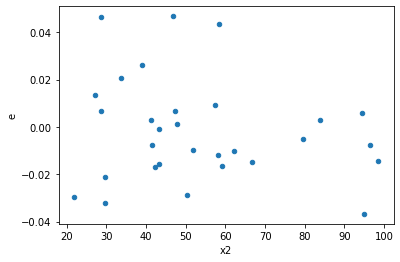

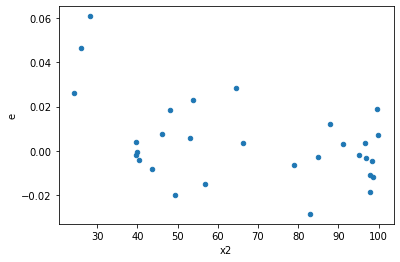

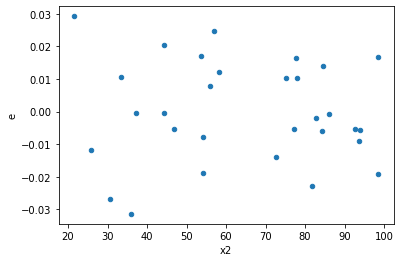

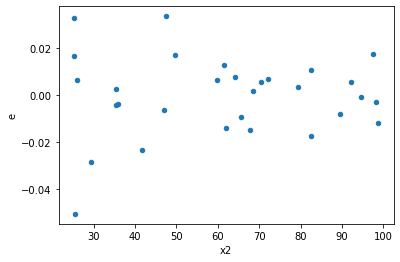

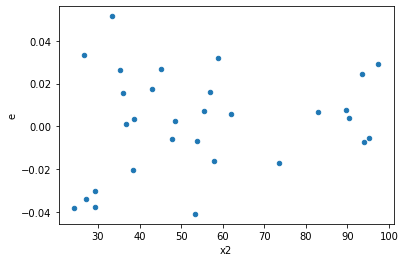

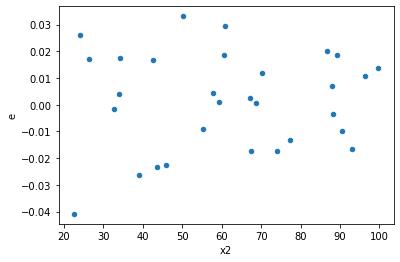

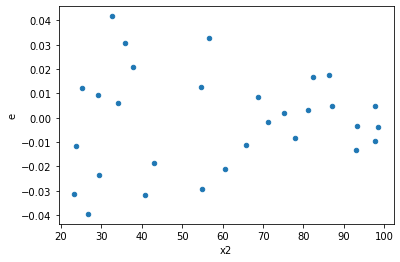

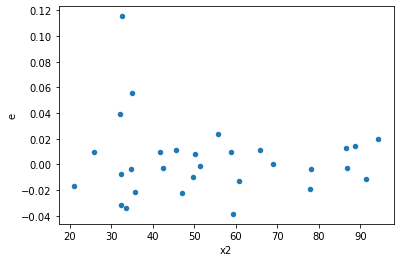

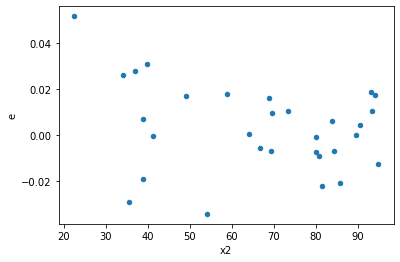

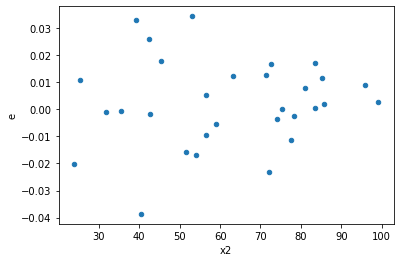

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,9.0,0.0021853619461052144,0.002782335126943519,0.0002428179940116905,0.00030914834743816876,1.2731690198514891,0.7248796903084629,0.6375601548457686,0.36243984515423144,Reject001=1 : Homoscedasticity
13.0,9.0,9.0,0.0036270034947785356,0.005943330321360473,0.0004030003883087262,0.0006603700357067192,1.6386337454365678,0.4733532845020503,0.7633233577489749,0.23667664225102514,Reject001=1 : Homoscedasticity
23.0,9.0,9.0,0.0013688019404643056,0.0015191321632398104,0.00015208910449603395,0.00016879246258220116,1.1098261321316596,0.8791883657555197,0.5604058171222401,0.43959418287775986,Reject001=1 : Homoscedasticity
28.0,9.0,9.0,0.0049590163185395065,0.01416771131011212,0.0005510018131710563,0.0015741901455680132,2.85696000981999,0.1337677890243234,0.9331161054878383,0.0668838945121617,Reject001=1 : Homoscedasticity
29.0,9.0,9.0,0.002384186957032904,0.0036106600455825468,0.00026490966189254486,0.00040118444950917187,1.5144198465358507,0.546217175961222,0.726891412019389,0.273108587980611,Reject001=1 : Homoscedasticity
32.0,9.0,9.0,0.001380129490629675,0.0022024166471868367,0.000153347721181075,0.0002447129607985374,1.5958043517945542,0.4971867593199968,0.7514066203400016,0.2485933796599984,Reject001=1 : Homoscedasticity
35.0,9.0,9.0,0.001257109683653225,0.002038994330124705,0.00013967885373924723,0.00022655492556941168,1.6219701086060234,0.4824718728358688,0.7587640635820656,0.2412359364179344,Reject001=1 : Homoscedasticity
39.0,9.0,9.0,0.0027370230190081153,0.00477809804063809,0.00030411366877867947,0.0005308997822931211,1.7457281168097925,0.4191537778943566,0.7904231110528217,0.2095768889471783,Reject001=1 : Homoscedasticity
40.0,9.0,9.0,0.0020216764397154134,0.002144584515671289,0.00022463071552393483,0.00023828716840792097,1.0607951270249638,0.9313856262351212,0.5343071868824394,0.4656928131175606,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0037457052137233053,0.0033591685822667488,0.0004161894681914784,0.0003732409535851943,0.8968053785865515,0.8737715073912248,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.005277905276704704,0.0012576989816330021,0.000586433919633856,0.0001397443312925558,0.23829510301826698,0.04397966015751085,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.002936036557336537,0.0009706220960698565,0.00032622628414850414,0.00010784689956331739,0.3305892406702077,0.1146943967255948,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.0021853619461052144,0.002782335126943519,0.0002428179940116905,0.00030914834743816876,1.2731690198514891,0.7248796903084629,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.005722115077944081,0.003748895793217915,0.000635790564216009,0.00041654397702421274,0.6551591050078757,0.5387107758835896,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.004005552406229741,0.0032739838008512497,0.0004450613784699712,0.0003637759778723611,0.8173613696226519,0.7687589808474539,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.003268224269741951,0.0010595468721551818,0.0003631360299713279,0.00011772743023946464,0.32419650082301127,0.10871459315003872,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.007697070301719391,0.004744781457886029,0.0008552300335243768,0.0005271979397651143,0.616439927387194,0.482334750485794,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.002635599849845462,0.0019642387475122336,0.0002928444277606069,0.00021824874972358152,0.7452719909767056,0.6685017013782859,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      825
Reject001=0 : Heteroscedasticity    175
Name: Result_test, dtype: int64